## Building an Image Classifier With a Single Layer Neural Net ##

The first thing we need to do is prep the dataset, and in this case we're using CIFAR-10, a dataset for image classification.

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

# import data
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


Next, we need to define the neural net. Here, our neural net will have two fully connected layers, called fc1 and fc2. The first layer, fc1, takes an image as input, and has 100 hidden neurons. The second layer, fc2, has 100 input neurons and num_classes output neurons. Since there are 10 classes, the parameter num_class defaults to 10. 

In [4]:
# create the data object
dataset = Data()

# visualize data
import torch.nn as nn
 
class SimpleNet(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 100) # Fully connected layer with 100 hidden neurons
        self.fc2 = nn.Linear(100, num_classes) # Fully connected layer with num_classes outputs
 
    def forward(self, x):
        x = x.view(-1, 32*32*3) # reshape the input tensor
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x
    
# instantiate the model
model = SimpleNet()

Now, we'll need to train the models. We'll create two instances of DataLoader- one for training, and one for testing. Then, we can set a loop to train the model. 

In [5]:
# load the data into pytorch dataloader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)
 
# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# train the model
num_epochs = 20
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []
 
# Loop through the number of epochs
for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    val_loss = 0.0
    val_acc = 0.0
 
    # set model to train mode
    model.train()
    # iterate over the training data
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        #compute the loss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # increment the running loss and accuracy
        train_loss += loss.item()
        train_acc += (outputs.argmax(1) == labels).sum().item()
 
    # calculate the average training loss and accuracy
    train_loss /= len(train_loader)
    train_loss_history.append(train_loss)
    train_acc /= len(train_loader.dataset)
    train_acc_history.append(train_acc)
 
    # set the model to evaluation mode
    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.argmax(1) == labels).sum().item()
 
    # calculate the average validation loss and accuracy
    val_loss /= len(test_loader)
    val_loss_history.append(val_loss)
    val_acc /= len(test_loader.dataset)
    val_acc_history.append(val_acc)
 
    print(f'Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f}, train acc: {train_acc:.4f}, val loss: {val_loss:.4f}, val acc: {val_acc:.4f}')

Epoch 1/20, train loss: 1.8819, train acc: 0.3242, val loss: 1.8206, val acc: 0.3486
Epoch 2/20, train loss: 1.7353, train acc: 0.3808, val loss: 1.6923, val acc: 0.4031
Epoch 3/20, train loss: 1.6646, train acc: 0.4069, val loss: 1.6673, val acc: 0.3983
Epoch 4/20, train loss: 1.6187, train acc: 0.4239, val loss: 1.5861, val acc: 0.4354
Epoch 5/20, train loss: 1.5912, train acc: 0.4316, val loss: 1.6105, val acc: 0.4267
Epoch 6/20, train loss: 1.5738, train acc: 0.4394, val loss: 1.5782, val acc: 0.4325
Epoch 7/20, train loss: 1.5553, train acc: 0.4485, val loss: 1.5650, val acc: 0.4416
Epoch 8/20, train loss: 1.5407, train acc: 0.4531, val loss: 1.5427, val acc: 0.4503
Epoch 9/20, train loss: 1.5268, train acc: 0.4560, val loss: 1.5827, val acc: 0.4362
Epoch 10/20, train loss: 1.5213, train acc: 0.4606, val loss: 1.5235, val acc: 0.4564
Epoch 11/20, train loss: 1.5078, train acc: 0.4645, val loss: 1.5214, val acc: 0.4622
Epoch 12/20, train loss: 1.5030, train acc: 0.4662, val loss: 1

As we can see, after training for 20 epochs, the model has a validation accuracy of about 46 percent, which isn't great. If we train it more, that percentage should increase to something more desireable, but for the sake of ease, I've left it at 20. It's also worth noting that the model only has 1 layer with 100 hidden neurons, and increaseing these numbers will also see the validation accuracy increase rather significantly. 

After training, we can plot loss and accuracy matrices.

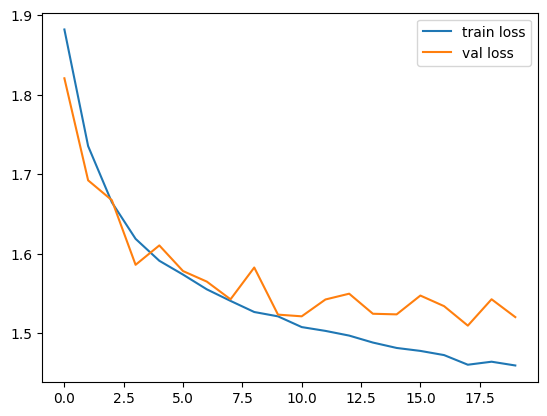

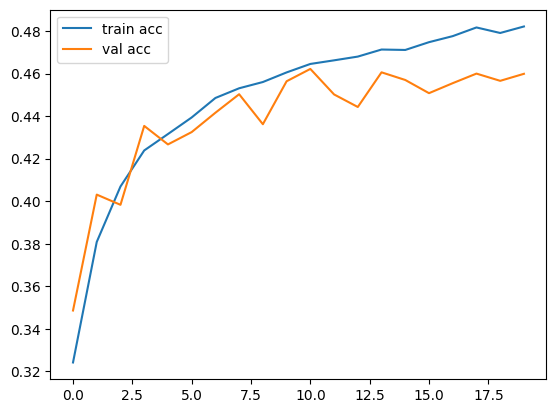

In [6]:
import matplotlib.pyplot as plt
 
# loss
plt.plot(train_loss_history, label='train loss')
plt.plot(val_loss_history, label='val loss')
plt.legend()
plt.show()
 
# accuracy
plt.plot(train_acc_history, label='train acc')
plt.plot(val_acc_history, label='val acc')
plt.legend()
plt.show()

Finally, we can see how the model makes predictions against actual labels.

True Labels:  tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3])
Predicted Labels:  tensor([6, 9, 9, 0, 4, 6, 1, 2, 5, 1, 8, 9, 5, 7, 1, 8, 7, 2, 8, 6, 4, 2, 0, 9,
        4, 6, 6, 2, 9, 6, 6, 2, 2, 5, 9, 7, 2, 9, 1, 5, 7, 6, 9, 6, 0, 9, 6, 3,
        4, 6, 9, 2, 6, 7, 8, 8, 7, 1, 8, 2, 7, 6, 7, 5])


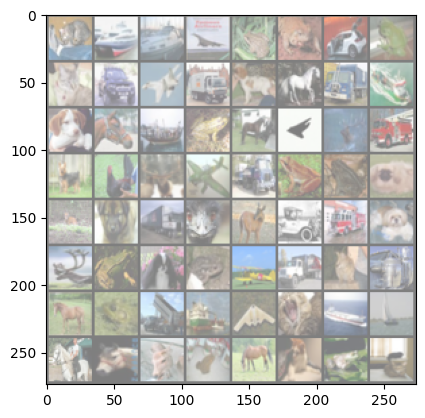

In [7]:
import numpy as np
 
# get some validation data
for inputs, labels in test_loader:
    break  # this line stops the loop after the first iteration
 
# make predictions
outputs = model(inputs)
_, predicted = torch.max(outputs, 1)
 
# display the images and their labels
img_grid = torchvision.utils.make_grid(inputs)
img_grid = img_grid / 2 + 0.5     # unnormalize
npimg = img_grid.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
 
print('True Labels: ', labels)
print('Predicted Labels: ', predicted)

And... we're done! Lovely. That's all for today.